### Importing Libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Data Gathering

In [126]:
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [83]:
# More Info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [84]:
# Getting shape of data
df.shape

(614, 13)

In [85]:
# Statistical Measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


* From this all info, we can conclude that many numerical columns are not normally distributed, and also there are many null values, also we can change the datatype of object features to category to reduce the size and improve the performance.

### Data Preprocessing

In [86]:
# Checking NUll Values
(df.isnull().sum()/df.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [127]:
# Replacing Null Values with its mean in Numerical columns
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [128]:
# Replacing Null values with its mode in Categorical values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [89]:
# Again checking Null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [90]:
# Checking for Duplicate values
df.duplicated().sum()

0

* In this section, we remove the null values which we done using Complete Case Analysis (CCA) i.e. replce them with mean and mode if the null percentage is less than or equal to 5. We have just 1 feature extra which has higher percentage of sparsity i.e. and I replace it with the common one i.e. mean to have a normal distribution.

### Exploratory Data Analysis (EDA)

* Categorical Columns

<Axes: xlabel='Gender', ylabel='count'>

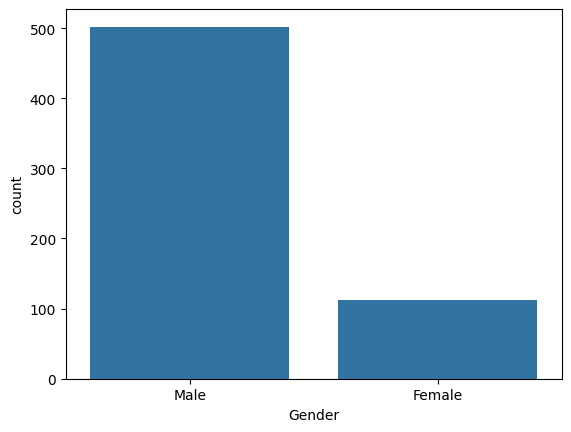

In [91]:
sns.countplot(x=df['Gender'])

<Axes: xlabel='Married', ylabel='count'>

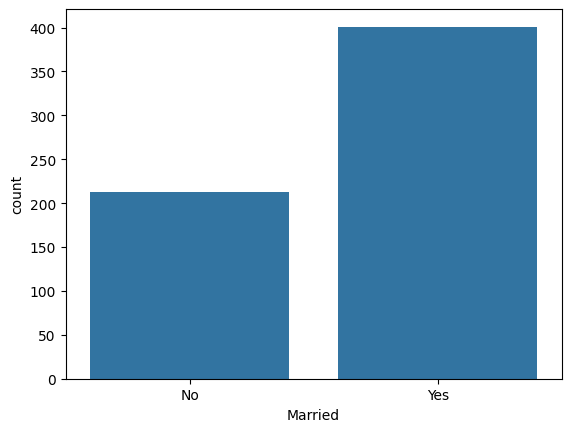

In [92]:
sns.countplot(x=df['Married'])

<Axes: xlabel='Dependents', ylabel='count'>

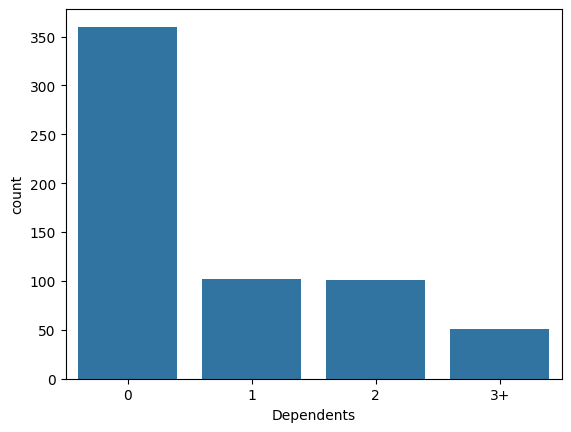

In [93]:
sns.countplot(x=df['Dependents'])

<Axes: xlabel='Education', ylabel='count'>

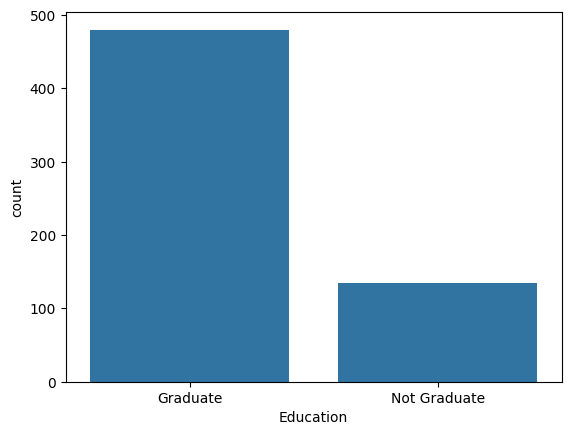

In [94]:
sns.countplot(x=df['Education'])

<Axes: xlabel='Self_Employed', ylabel='count'>

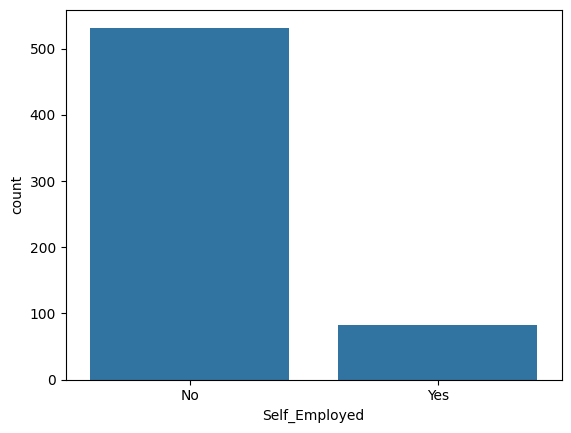

In [95]:
sns.countplot(x=df['Self_Employed'])

<Axes: xlabel='Property_Area', ylabel='count'>

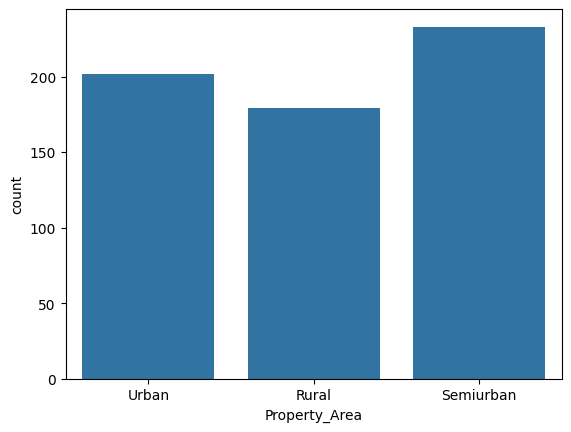

In [96]:
sns.countplot(x=df['Property_Area'])

<Axes: xlabel='Loan_Status', ylabel='count'>

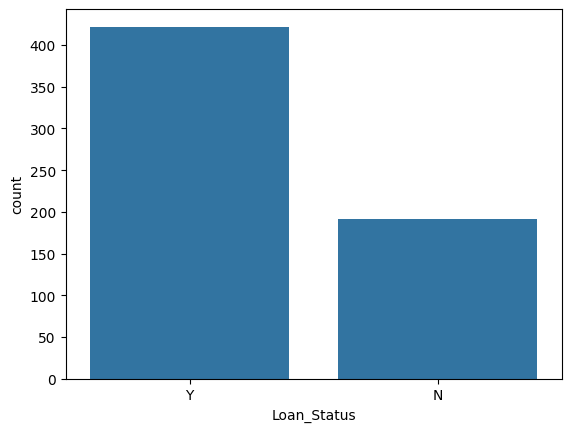

In [97]:
sns.countplot(x=df['Loan_Status'])

* From above visualizations, we can say that our data is a little imbalance.
* Persons are generally male, married, and 0 dependents and mostly are graduated people.

* Numerical Columns

In [129]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


<ipython-input-130-4fe14db8f0cd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

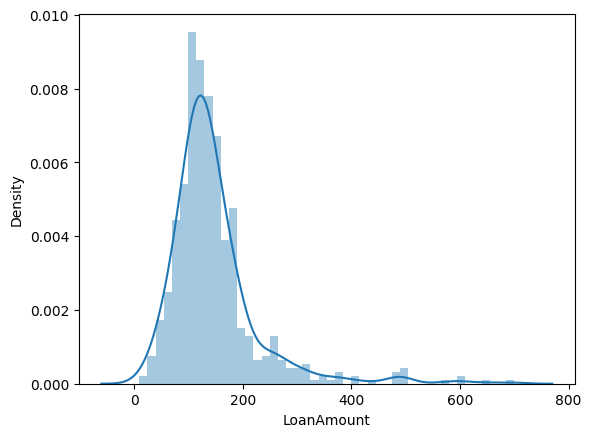

In [130]:
sns.distplot(df['LoanAmount'])

<ipython-input-131-bf1c3ca3571c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount_Log'])


<Axes: xlabel='LoanAmount_Log', ylabel='Density'>

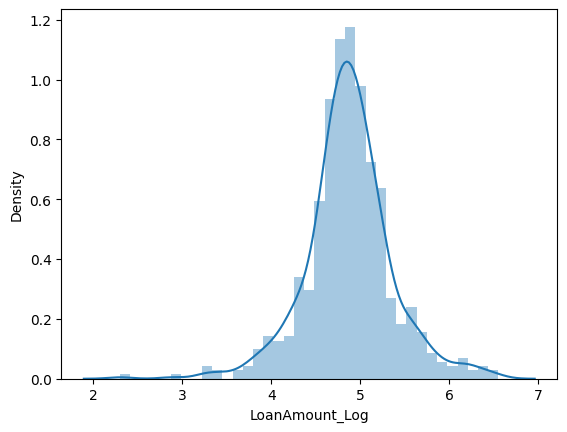

In [131]:
df['LoanAmount_Log'] = np.log(df['LoanAmount']+1)
sns.distplot(df['LoanAmount_Log'])

<ipython-input-132-dd358a5a6987>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

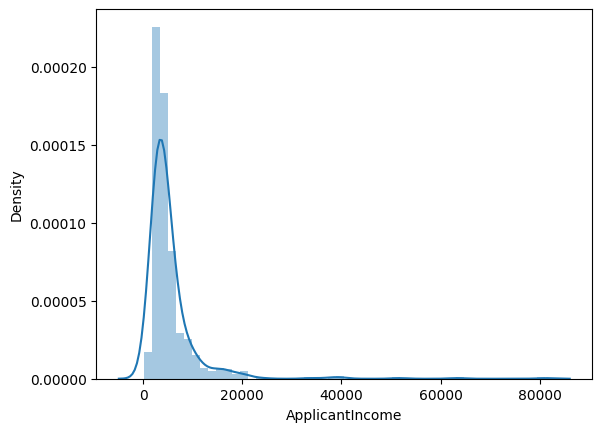

In [132]:
sns.distplot(df['ApplicantIncome'])

<ipython-input-133-5d81fc0da3c8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome_Log'])


<Axes: xlabel='ApplicantIncome_Log', ylabel='Density'>

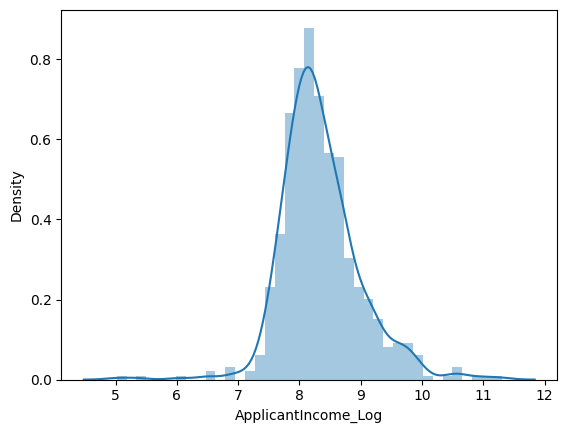

In [133]:
df['ApplicantIncome_Log'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncome_Log'])

<ipython-input-134-fa3d0fdb862e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

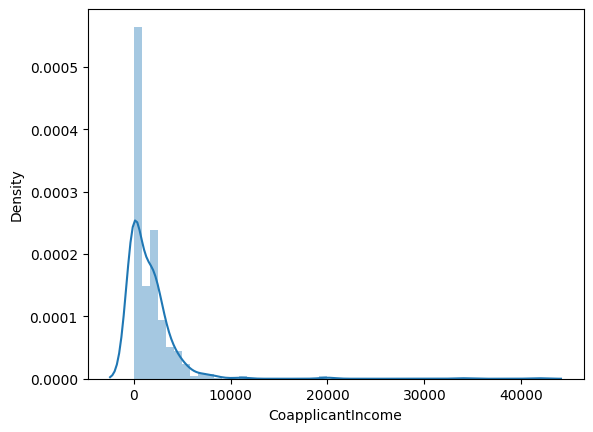

In [134]:
sns.distplot(df['CoapplicantIncome'])

<ipython-input-135-6df0f33c762b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome_Log'])


<Axes: xlabel='CoapplicantIncome_Log', ylabel='Density'>

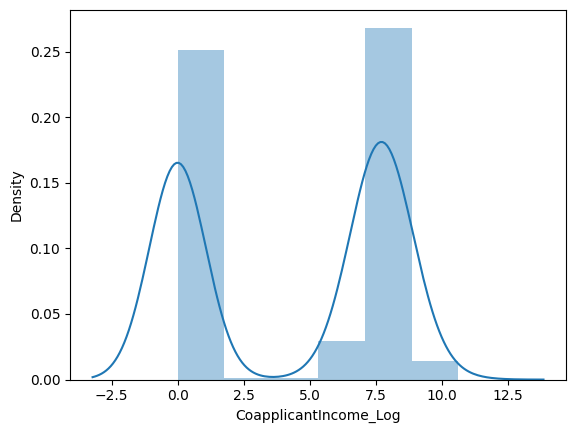

In [135]:
df['CoapplicantIncome_Log'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df['CoapplicantIncome_Log'])

<ipython-input-136-f274b1dfc1cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term'])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

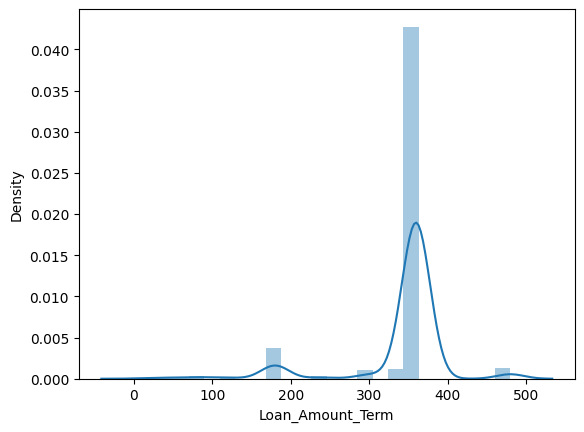

In [136]:
sns.distplot(df['Loan_Amount_Term'])

<ipython-input-137-b3fe93703dfc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term_Log'])


<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

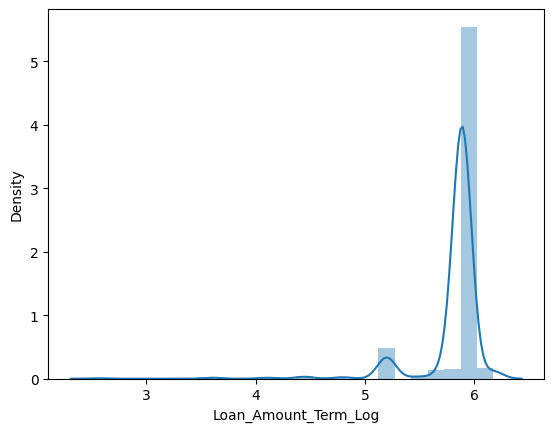

In [137]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df['Loan_Amount_Term_Log'])

<ipython-input-138-8884ab6122a6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Credit_History'])


<Axes: xlabel='Credit_History', ylabel='Density'>

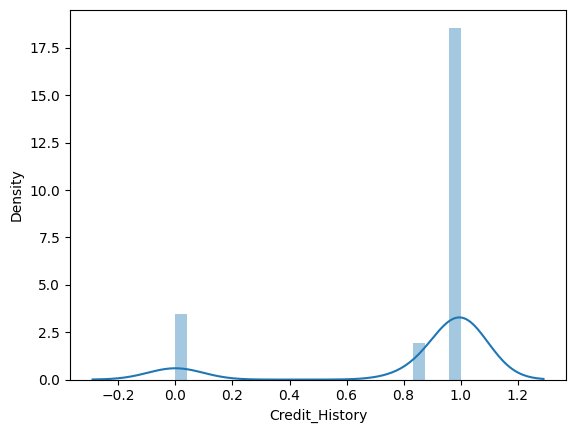

In [138]:
sns.distplot(df['Credit_History'])

<ipython-input-143-68266dfca9da>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Income'])


<Axes: xlabel='Total_Income', ylabel='Density'>

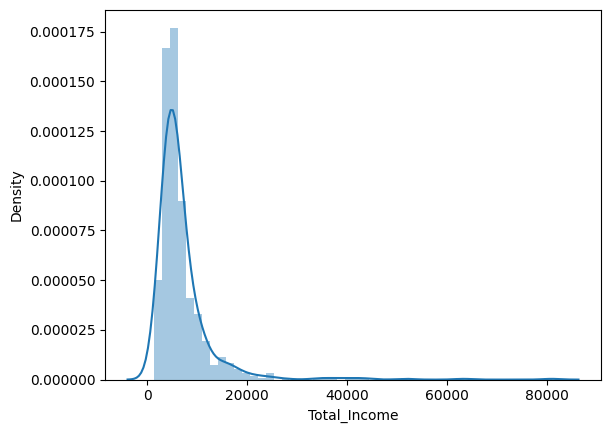

In [143]:
sns.distplot(df['Total_Income'])

<ipython-input-140-b236da262c25>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Income_Log'])


<Axes: xlabel='Total_Income_Log', ylabel='Density'>

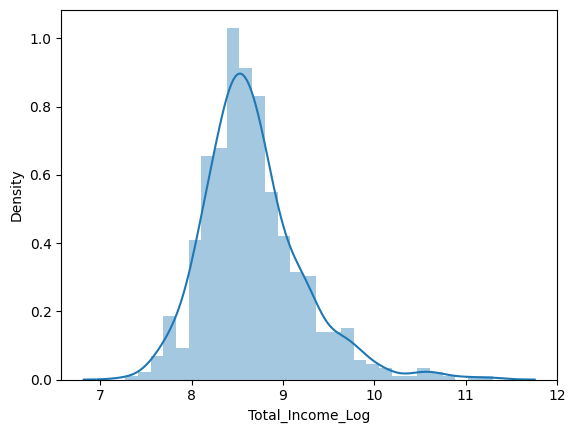

In [140]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
sns.distplot(df['Total_Income_Log'])

* In this section, we analyze the distribution of all features, and make suitable transformations as per the feature distribution.

In [141]:
# Checking dataset after transformations
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,LoanAmount_Log,ApplicantIncome_Log,CoapplicantIncome_Log,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,4.993232,8.674197,0.000000,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,4.859812,8.430327,7.319202,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,4.204693,8.006701,0.000000,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,4.795791,7.857094,7.765993,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,4.955827,8.699681,0.000000,5.888878,8.699681


### Correlation Matrix

<Figure size 1500x1000 with 0 Axes>

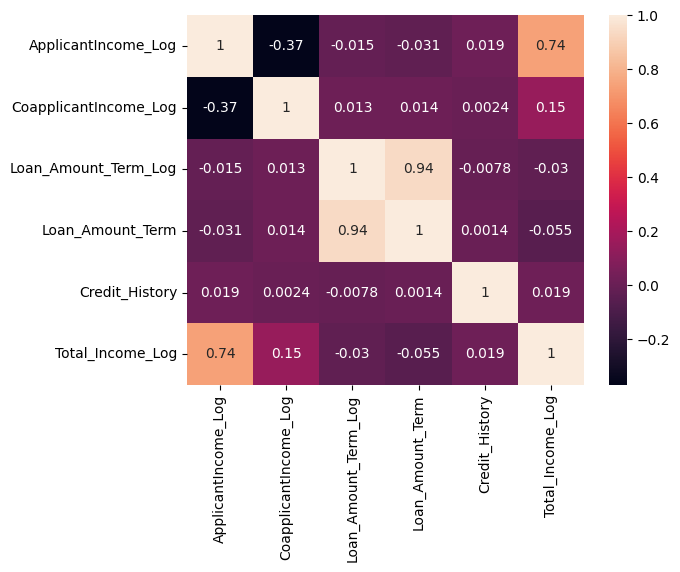

<Figure size 1500x1000 with 0 Axes>

In [151]:
corr = df[['ApplicantIncome_Log','CoapplicantIncome_Log','Loan_Amount_Term_Log','Loan_Amount_Term','Credit_History','Total_Income_Log']].corr()
sns.heatmap(corr,annot=True)
plt.figure(figsize=(15,10))

In [152]:
# Dropping Some ir-relevant columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
df = df.drop(columns=cols,axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_Log,ApplicantIncome_Log,CoapplicantIncome_Log,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,4.993232,8.674197,0.000000,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4.859812,8.430327,7.319202,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.204693,8.006701,0.000000,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.795791,7.857094,7.765993,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,4.955827,8.699681,0.000000,5.888878,8.699681


### Label Encoding

In [159]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
for col in cols:
  df[col] = le.fit_transform(df[col])

In [160]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_Log,ApplicantIncome_Log,CoapplicantIncome_Log,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,4.993232,8.674197,0.000000,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,4.859812,8.430327,7.319202,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,4.204693,8.006701,0.000000,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,4.795791,7.857094,7.765993,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,4.955827,8.699681,0.000000,5.888878,8.699681


In [163]:
df['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

### Model Training

In [165]:
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [166]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [167]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [176]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
classify(lr_model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.78368652538984


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [177]:
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier()
classify(dc_model, X, y)

Accuracy is 74.67532467532467
Cross validation is 73.29201652672265


In [178]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
rf_model = RandomForestClassifier()
classify(rf_model, X, y)

Accuracy is 77.92207792207793
Cross validation is 78.17939490870319


In [179]:
et_model = ExtraTreesClassifier()
classify(et_model, X, y)

Accuracy is 74.02597402597402
Cross validation is 76.71064907370383


### Hyper-Parameter Tuning

In [173]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [100,300,500],
              'max_depth': [None,10,50,100],
              'min_samples_split': [10,15,20,25],
              'min_samples_leaf': [2,5,7,10]
              }
rf_model = RandomForestClassifier()
clf_model = GridSearchCV(rf_model,param_grid = parameters, scoring = "accuracy")

In [175]:
clf_model.fit(x_train,y_train)
print(clf_model.best_score_)
print(clf_model.best_params_)

0.8239130434782609
{'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 500}


In [182]:
from sklearn.metrics import accuracy_score
rf_model_new = RandomForestClassifier(max_depth=None, min_samples_leaf=5,min_samples_split=10,n_estimators=500)
classify(rf_model_new,X,y)

Accuracy is 77.27272727272727
Cross validation is 80.45981607357056


### Predictions

In [183]:
model = RandomForestClassifier(max_depth=None, min_samples_leaf=5,min_samples_split=10,n_estimators=500)
model.fit(X,y)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=10,
                       n_estimators=500)

<Axes: >

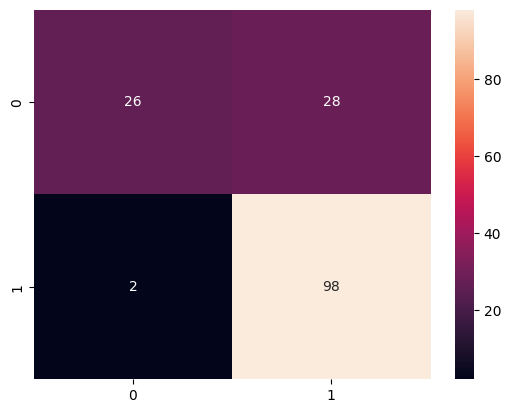

In [184]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

### Saving the Model

In [185]:
import pickle
filename = 'Loan_Prediction.sav'
pickle.dump(model,open(filename,'wb'))

In [187]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8051948051948052
